In [3]:
# Import all libraries
import os
import numpy as np
import matplotlib
import pylab as plt
import random
import h5py
import stainNorm_Vahadane as stainNorm


In [4]:
#data dirs
data_dir = './data/'
train_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_train_x.h5')
valid_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_valid_x.h5')
test_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_test_x.h5')

dirs = [valid_dir_x, test_dir_x, train_dir_x]
names = ["x_valid", "x_test", "x_train"]

print(train_dir_x)

./data/camelyonpatch_level_2_split_train_x.h5


In [5]:
def getTarget(data_dir):
    with h5py.File(data_dir, 'r') as hdf:
        target = list(hdf['x'][0])
        return np.array(target)/255
    
def getlengths(dirs):
    lengths = []
    shapes = []
    for d in dirs:
        with h5py.File(d, 'r') as hdf:
            lengths.append(len(hdf['x']))
            shapes.append(hdf['x'].shape)
    return np.array(lengths), shapes
        
    
def getData(data_dir, i):
    with h5py.File(data_dir, 'r') as hdf:

        data = np.array(list(hdf['x'][i]))
        
        return data
    
def getDataSample(data_dir, a):
    with h5py.File(data_dir, 'r') as hdf:
        data = []
        for i in a:
            data.append(np.array(list(hdf['x'][i])))
        return np.array(data)
    
class StainNormalizer:
    def __init__(self, target):
        self.target = target
        self.normalizer = stainNorm.Normalizer()
        self.normalizer.fit(self.target)
        
    def normalize(self, data):
        return self.normalizer.transform(data)
    
def normalize_datasets(dirs, names, lengths, shapes, stain_normalizer):
    #create dir if not exists
    saving_dir = './data/normalized_Vahadane/'
    if(not os.path.exists(saving_dir)):
        os.mkdir(saving_dir)
        
    for i in range(len(dirs)):
        #set path
        path = os.path.join(saving_dir, names[i]+".h5")
        #create empty dataset
        h5f = h5py.File(path, 'w')
        h5f.create_dataset("x", shapes[i], dtype='uint8')
        h5f.close()
        #check if it is correct
        l = 0
        with h5py.File(path, 'r') as hdf:
            print("path = {}, length = {}, shape = {}".format(path, len(hdf['x']), hdf['x'].shape))
            l = len(hdf['x'])
            
        for j in range(l):
            print('j = {}'.format(j))
            data = getData(dirs[i], j)
            data = stain_normalizer.normalize(data)
            with h5py.File(path, 'a') as hf:
                hf["x"][j] = data
            
            
        

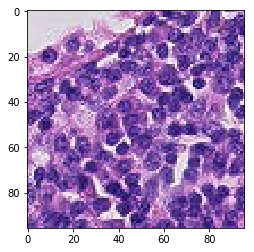

In [6]:
#get variables
lengths, shapes = getlengths(dirs)
target = getTarget(train_dir_x)
plt.imshow(target)
stain_normalizer = StainNormalizer(target)

In [ ]:
#normalize datasets
normalize_datasets(dirs, names, lengths, shapes,  stain_normalizer)

path = ./data/normalized_Vahadane/x_valid.h5, length = 32768, shape = (32768, 96, 96, 3)
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77


In [ ]:
#test if it worked valid
a = np.random.randint(16384, size=10)
print(a)
x_norm = getDataSample("./data/normalized/x_valid.h5", a)
x = getDataSample(valid_dir_x, a)

In [ ]:
for i in range(10):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.subplot(2,10,i+1)
    plt.title("x[{}]".format(a[i]))
    plt.imshow(x[i])
    plt.subplot(2,10,10+i+1)
    plt.title(" x_n[{}]".format(a[i]))
    plt.imshow(x_norm[i])

In [ ]:
x_norm = getDataSample("./data/normalized/x_test.h5", a)
x = getDataSample(test_dir_x, a)

In [ ]:
for i in range(10):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.subplot(2,10,i+1)
    plt.title("x[{}]".format(a[i]))
    plt.imshow(x[i])
    plt.subplot(2,10,10+i+1)
    plt.title(" x_n[{}]".format(a[i]))
    plt.imshow(x_norm[i])

In [ ]:
x_norm = getDataSample("./data/normalized/x_train.h5", a)
x = getDataSample(train_dir_x, a)

In [ ]:
for i in range(10):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.subplot(2,10,i+1)
    plt.title("x[{}]".format(a[i]))
    plt.imshow(x[i])
    plt.subplot(2,10,10+i+1)
    plt.title(" x_n[{}]".format(a[i]))
    plt.imshow(x_norm[i])

In [ ]:
a = np.random.randint(262144, size=10)
print(a)
x_norm = getDataSample("./data/normalized/x_train.h5", a)
x = getDataSample(train_dir_x, a)

In [ ]:
for i in range(10):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.subplot(2,10,i+1)
    plt.title("x[{}]".format(a[i]))
    plt.imshow(x[i])
    plt.subplot(2,10,10+i+1)
    plt.title(" x_n[{}]".format(a[i]))
    plt.imshow(x_norm[i])